In [11]:
import pandas as pd
import argparse
import os
from pyspark.sql import SparkSession
from prophet.serialize import model_to_json, model_from_json
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder \
    .master('local[1]') \
    .appName('Crypto Price Prediction') \
    .enableHiveSupport() \
    .getOrCreate()

spark.sparkContext.setLogLevel('ERROR')

In [19]:
df_spark = spark.sql( f'SELECT date, cryptocurrency, sentiment FROM crypto_sentiment_train_table WHERE cryptocurrency = "bitcoin"')

In [22]:
df = df_spark.toPandas()
df.date = pd.to_datetime(df.date)
df = df.resample('d', on='date').mean().dropna(how='all')

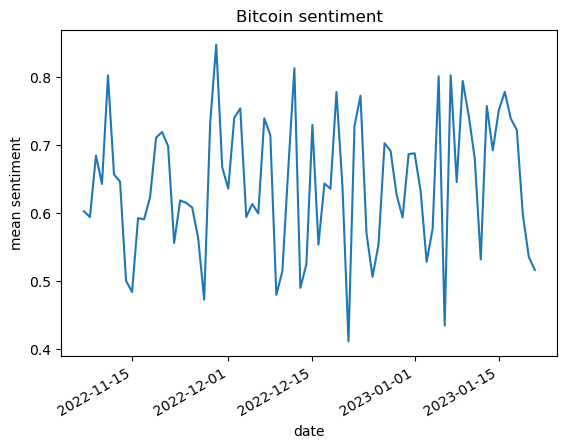

In [27]:
plt.plot(df.index, df.sentiment)
plt.gcf().autofmt_xdate()
plt.xlabel('date')
plt.ylabel('mean sentiment')
plt.title('Bitcoin sentiment')
plt.show()